In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Load Data
df = pd.read_csv('waze_dataset.csv')

# 2. Data Cleaning

df = df.dropna(subset=['label'])

# 3. Feature Engineering

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'] = df['km_per_driving_day'].replace([np.inf, -np.inf], 0)

# 4. Encoding Categorical Variables

df['device_type'] = np.where(df['device'] == 'iPhone', 1, 0)
df['label_encoded'] = np.where(df['label'] == 'churned', 1, 0)

# 5. Define Features (X) and Target (y)
X = df.drop(columns=['ID', 'label', 'device', 'label_encoded'])
y = df['label_encoded']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Class distribution:\n{y_train.value_counts(normalize=True)}")

Training set size: (11439, 12)
Class distribution:
label_encoded
0    0.822624
1    0.177376
Name: proportion, dtype: float64


Training Random Forest...
Training XGBoost...

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2353
           1       0.46      0.11      0.17       507

    accuracy                           0.82      2860
   macro avg       0.65      0.54      0.54      2860
weighted avg       0.77      0.82      0.77      2860



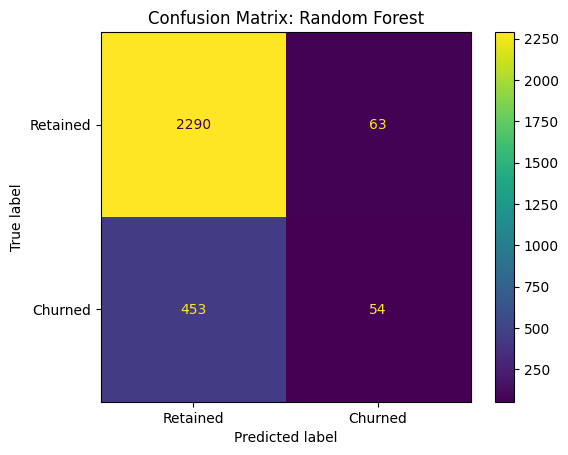


--- XGBoost Performance ---
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2353
           1       0.42      0.17      0.24       507

    accuracy                           0.81      2860
   macro avg       0.63      0.56      0.57      2860
weighted avg       0.77      0.81      0.78      2860



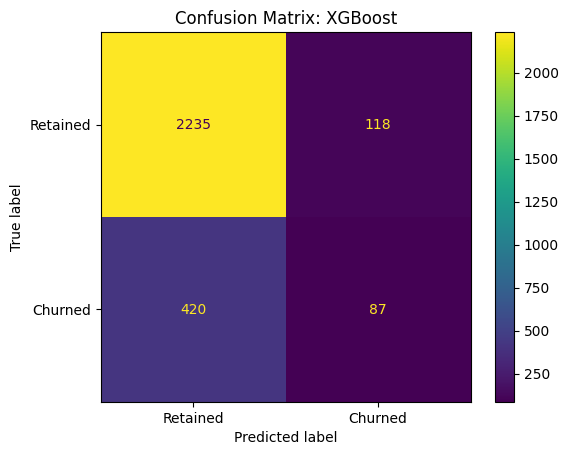

In [3]:
# 1. Initialize Models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Train Random Forest
print("Training Random Forest...")
rf.fit(X_train, y_train)

# 3. Train XGBoost
print("Training XGBoost...")
xgb.fit(X_train, y_train)

# 4. Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    print(f"\n--- {model_name} Performance ---")
    print(classification_report(y_test, preds))
    
    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=['Retained', 'Churned'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Run Evaluation
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")